In [1]:
import pandas_datareader.data as web
from datetime import datetime,timedelta
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import numpy as np

In [2]:
start = datetime(2015,1,2)
end = datetime(2020,11,20)

In [3]:
dis = web.DataReader('DIS',data_source='yahoo',start=start,end=end)
dis.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,95.279999,92.849998,94.910004,93.750000,5865400.0,87.376266
2015-01-05,93.349998,91.779999,93.279999,92.379997,7789400.0,86.099403
2015-01-06,93.190002,91.160004,92.570000,91.889999,6793100.0,85.642708
2015-01-07,93.150002,92.099998,92.720001,92.830002,6589500.0,86.518814
2015-01-08,94.300003,93.559998,93.870003,93.790001,7579400.0,87.413536


In [4]:
returns = 100*dis.Close.pct_change().dropna()

Text(0, 0.5, 'PCT return')

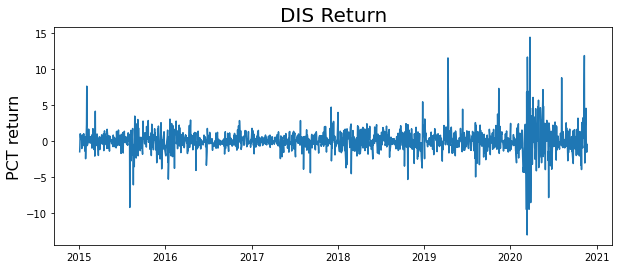

In [5]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.title('DIS Return',fontsize=20)
plt.ylabel('PCT return',fontsize=16)

## PACF

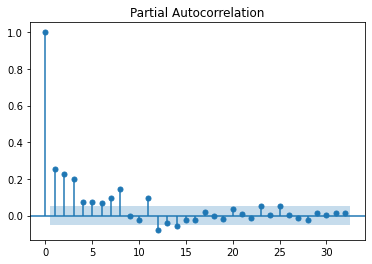

In [6]:
plot_pacf(returns**2)
plt.show()

### GARCH(3,3)

In [7]:
model = arch_model(returns,p=3,q=3)

In [8]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 331163875322.4874
Iteration:      2,   Func. Count:     22,   Neg. LLF: 1038234194.7178442
Iteration:      3,   Func. Count:     33,   Neg. LLF: 2977.26509305133
Iteration:      4,   Func. Count:     43,   Neg. LLF: 2924.085507335337
Iteration:      5,   Func. Count:     53,   Neg. LLF: 2609.009654427932
Iteration:      6,   Func. Count:     63,   Neg. LLF: 2668.3002533450854
Iteration:      7,   Func. Count:     73,   Neg. LLF: 2601.9124548186355
Iteration:      8,   Func. Count:     83,   Neg. LLF: 2609.051602126957
Iteration:      9,   Func. Count:     93,   Neg. LLF: 2590.108748955195
Iteration:     10,   Func. Count:    103,   Neg. LLF: 2598.649006399376
Iteration:     11,   Func. Count:    113,   Neg. LLF: 2585.8421310605427
Iteration:     12,   Func. Count:    123,   Neg. LLF: 2584.1591788141504
Iteration:     13,   Func. Count:    132,   Neg. LLF: 2584.1038870097373
Iteration:     14,   Func. Count:    141,   Neg. LLF: 2584.

In [9]:
print(model_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -2584.09
Distribution:                  Normal   AIC:                           5184.17
Method:            Maximum Likelihood   BIC:                           5226.59
                                        No. Observations:                 1483
Date:                Sun, Nov 22 2020   Df Residuals:                     1475
Time:                        17:50:56   Df Model:                            8
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0172  4.308e-02     -0.399      0.690 [ -0.102,

##### since none of the beta values are significant, so we can remove the lag parameter i.e 3

## GARCH(3,0) = ARCH(3)

In [10]:
model = arch_model(returns, p=3, q=0)

In [11]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 5381.176367094078
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6955.269076070574
Iteration:      3,   Func. Count:     25,   Neg. LLF: 5529.576431394257
Iteration:      4,   Func. Count:     32,   Neg. LLF: 637951.0769496545
Iteration:      5,   Func. Count:     39,   Neg. LLF: 7564.9041613655745
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2757.886721170416
Iteration:      7,   Func. Count:     54,   Neg. LLF: 2944.396437123131
Iteration:      8,   Func. Count:     62,   Neg. LLF: 6179.625420007831
Iteration:      9,   Func. Count:     69,   Neg. LLF: 2602.825918543302
Iteration:     10,   Func. Count:     75,   Neg. LLF: 2600.2023074563313
Iteration:     11,   Func. Count:     81,   Neg. LLF: 2599.7776828955284
Iteration:     12,   Func. Count:     87,   Neg. LLF: 2599.7478266261514
Iteration:     13,   Func. Count:     93,   Neg. LLF: 2599.7469922761984
Iteration:     14,   Func. Count:     99,   Neg. LLF: 2599.

In [12]:
print(model_fit.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                  Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -2599.75
Distribution:                  Normal   AIC:                           5209.49
Method:            Maximum Likelihood   BIC:                           5236.00
                                        No. Observations:                 1483
Date:                Sun, Nov 22 2020   Df Residuals:                     1478
Time:                        17:50:56   Df Model:                            5
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0165  4.435e-02     -0.371      0.710 [ -0.103,

In [13]:
rolling_forecasting = []
test_size = 365
for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train,p=3,q=0)
    model_fit=model.fit()
    pred = model_fit.forecast(horizon=1)
    rolling_forecasting.append(np.array(pred.variance.values[-1:][0]))

Iteration:      1,   Func. Count:      7,   Neg. LLF: 4725.133175533945
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4320.048940646535
Iteration:      3,   Func. Count:     25,   Neg. LLF: 3145.5999009939583
Iteration:      4,   Func. Count:     32,   Neg. LLF: 4622.318006388505
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2106.5855650629796
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1856.6413223169334
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1937.0989131184297
Iteration:      8,   Func. Count:     61,   Neg. LLF: 1817.561684863468
Iteration:      9,   Func. Count:     68,   Neg. LLF: 1789.5633697391397
Iteration:     10,   Func. Count:     75,   Neg. LLF: 1788.635326690659
Iteration:     11,   Func. Count:     81,   Neg. LLF: 1788.6321134525938
Iteration:     12,   Func. Count:     87,   Neg. LLF: 1788.6320804187171
Iteration:     13,   Func. Count:     92,   Neg. LLF: 1788.632080418671
Optimization terminated successfully    (Exit mode 0)
   

Iteration:      5,   Func. Count:     39,   Neg. LLF: 2142.363569395586
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1866.4864503195176
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1938.3305105802206
Iteration:      8,   Func. Count:     61,   Neg. LLF: 1832.4386252343093
Iteration:      9,   Func. Count:     68,   Neg. LLF: 1800.0137134346821
Iteration:     10,   Func. Count:     75,   Neg. LLF: 1799.5745962390818
Iteration:     11,   Func. Count:     81,   Neg. LLF: 1799.5558318088601
Iteration:     12,   Func. Count:     87,   Neg. LLF: 1799.5557060194271
Iteration:     13,   Func. Count:     93,   Neg. LLF: 1799.555704806907
Iteration:     14,   Func. Count:     98,   Neg. LLF: 1799.5557048069159
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1799.555704806907
            Iterations: 14
            Function evaluations: 98
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      7,   Neg. LLF: 4667.1729

Iteration:      2,   Func. Count:     16,   Neg. LLF: 4459.209860748875
Iteration:      3,   Func. Count:     25,   Neg. LLF: 3296.2292024678254
Iteration:      4,   Func. Count:     32,   Neg. LLF: 4728.262456635823
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2167.6490126920216
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1876.857810430319
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1942.9214961383168
Iteration:      8,   Func. Count:     61,   Neg. LLF: 1839.963541717686
Iteration:      9,   Func. Count:     68,   Neg. LLF: 1808.6221292536095
Iteration:     10,   Func. Count:     75,   Neg. LLF: 1808.273244388639
Iteration:     11,   Func. Count:     81,   Neg. LLF: 1808.2542817566423
Iteration:     12,   Func. Count:     87,   Neg. LLF: 1808.2541651796669
Iteration:     13,   Func. Count:     93,   Neg. LLF: 1808.254164087837
Iteration:     14,   Func. Count:     98,   Neg. LLF: 1808.254164087847
Optimization terminated successfully    (Exit mode 0)
    

Iteration:      2,   Func. Count:     16,   Neg. LLF: 4503.664480478133
Iteration:      3,   Func. Count:     25,   Neg. LLF: 3315.909670908335
Iteration:      4,   Func. Count:     32,   Neg. LLF: 4807.796597494419
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2191.564695760265
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1890.2116548109339
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1942.731171913085
Iteration:      8,   Func. Count:     61,   Neg. LLF: 1851.8606202559235
Iteration:      9,   Func. Count:     68,   Neg. LLF: 1817.4883456996668
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1817.2888522030553
Iteration:     11,   Func. Count:     80,   Neg. LLF: 1817.2782452563233
Iteration:     12,   Func. Count:     86,   Neg. LLF: 1817.2779386225282
Iteration:     13,   Func. Count:     92,   Neg. LLF: 1817.2779350247824
Iteration:     14,   Func. Count:     97,   Neg. LLF: 1817.2779350247895
Optimization terminated successfully    (Exit mode 0)
  

Iteration:      1,   Func. Count:      7,   Neg. LLF: 4766.2042799538185
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4475.275749189654
Iteration:      3,   Func. Count:     25,   Neg. LLF: 3359.8883705640274
Iteration:      4,   Func. Count:     32,   Neg. LLF: 4772.031734444963
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2164.9886047458244
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1901.5412107535822
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1958.16625973258
Iteration:      8,   Func. Count:     61,   Neg. LLF: 1860.903323414268
Iteration:      9,   Func. Count:     68,   Neg. LLF: 1826.6158799247005
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1826.3244379497473
Iteration:     11,   Func. Count:     80,   Neg. LLF: 1826.3141227131853
Iteration:     12,   Func. Count:     86,   Neg. LLF: 1826.3137513305714
Iteration:     13,   Func. Count:     92,   Neg. LLF: 1826.3137472572187
Iteration:     14,   Func. Count:     97,   Neg. LLF: 18

Iteration:      6,   Func. Count:     46,   Neg. LLF: 1913.053238146008
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1970.3668595986005
Iteration:      8,   Func. Count:     61,   Neg. LLF: 1872.6538502156181
Iteration:      9,   Func. Count:     68,   Neg. LLF: 1837.1154554387072
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1836.8439678577872
Iteration:     11,   Func. Count:     80,   Neg. LLF: 1836.8311670444384
Iteration:     12,   Func. Count:     86,   Neg. LLF: 1836.8306328974454
Iteration:     13,   Func. Count:     92,   Neg. LLF: 1836.8306283815832
Iteration:     14,   Func. Count:     97,   Neg. LLF: 1836.8306283815946
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1836.8306283815832
            Iterations: 14
            Function evaluations: 97
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      7,   Neg. LLF: 4730.97560433083
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4567.8758

Iteration:     11,   Func. Count:     80,   Neg. LLF: 1858.3723160144905
Iteration:     12,   Func. Count:     86,   Neg. LLF: 1858.3722665551466
Iteration:     13,   Func. Count:     91,   Neg. LLF: 1858.3722665551522
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1858.3722665551466
            Iterations: 13
            Function evaluations: 91
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 4511.532551220989
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4808.672592381913
Iteration:      3,   Func. Count:     25,   Neg. LLF: 3202.7915978437945
Iteration:      4,   Func. Count:     32,   Neg. LLF: 86242.01381956137
Iteration:      5,   Func. Count:     39,   Neg. LLF: 5270.91915991912
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2203.7833632066568
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1869.4680286923588
Iteration:      8,   Func. Count:     60,   Neg. LLF: 1885.507744

Iteration:     11,   Func. Count:     80,   Neg. LLF: 1870.3193295477265
Iteration:     12,   Func. Count:     86,   Neg. LLF: 1870.3193002423118
Iteration:     13,   Func. Count:     92,   Neg. LLF: 1870.3192994411177
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1870.3192994411177
            Iterations: 13
            Function evaluations: 92
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 4707.138973648527
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4704.6339250906485
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2952.8131735174893
Iteration:      4,   Func. Count:     32,   Neg. LLF: 5533.07337194288
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2404.772725271201
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2292.2746398000318
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1885.491364345458
Iteration:      8,   Func. Count:     60,   Neg. LLF: 1911.461819

Iteration:      4,   Func. Count:     32,   Neg. LLF: 5347.622445318058
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2713.573579682624
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2327.367684339679
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1902.8173180311474
Iteration:      8,   Func. Count:     60,   Neg. LLF: 1944.545108215669
Iteration:      9,   Func. Count:     67,   Neg. LLF: 1889.188337896846
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1888.5904054282012
Iteration:     11,   Func. Count:     80,   Neg. LLF: 1888.5893719588437
Iteration:     12,   Func. Count:     86,   Neg. LLF: 1888.589355741597
Iteration:     13,   Func. Count:     91,   Neg. LLF: 1888.589355741558
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1888.589355741597
            Iterations: 13
            Function evaluations: 91
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 4803.630046685

Iteration:      1,   Func. Count:      7,   Neg. LLF: 4956.138044821069
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4606.728914446858
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2884.414713843209
Iteration:      4,   Func. Count:     32,   Neg. LLF: 5171.276492487295
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2381.143946152715
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2528.336701750481
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1914.7245319227616
Iteration:      8,   Func. Count:     60,   Neg. LLF: 1961.7034694040028
Iteration:      9,   Func. Count:     67,   Neg. LLF: 1904.0280682403777
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1901.4061557709902
Iteration:     11,   Func. Count:     80,   Neg. LLF: 1901.4014705105783
Iteration:     12,   Func. Count:     86,   Neg. LLF: 1901.4014127583418
Iteration:     13,   Func. Count:     91,   Neg. LLF: 1901.4014127582057
Optimization terminated successfully    (Exit mode 0)
   

Iteration:     12,   Func. Count:     86,   Neg. LLF: 1912.0736467605043
Iteration:     13,   Func. Count:     92,   Neg. LLF: 1912.0736461248084
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1912.0736461248084
            Iterations: 13
            Function evaluations: 92
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 5005.421398510301
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4626.72427764646
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2952.2664544459312
Iteration:      4,   Func. Count:     32,   Neg. LLF: 5094.324063773509
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2327.3326179431087
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2557.52418848485
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1933.1208577888556
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2010.155162915201
Iteration:      9,   Func. Count:     67,   Neg. LLF: 1917.78329845

Iteration:      1,   Func. Count:      7,   Neg. LLF: 5062.31028905701
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4636.028387759676
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2941.4654964491206
Iteration:      4,   Func. Count:     32,   Neg. LLF: 5125.836442713208
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2328.9420872117826
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2607.570615732522
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1943.7996100054665
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2020.1462093364926
Iteration:      9,   Func. Count:     67,   Neg. LLF: 1929.509447958691
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1925.7026113044335
Iteration:     11,   Func. Count:     80,   Neg. LLF: 1925.6979577895268
Iteration:     12,   Func. Count:     86,   Neg. LLF: 1925.6978681884443
Iteration:     13,   Func. Count:     92,   Neg. LLF: 1925.697867495934
Optimization terminated successfully    (Exit mode 0)
    

Iteration:      1,   Func. Count:      7,   Neg. LLF: 5102.013225711809
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4656.104454657468
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2969.1000083133417
Iteration:      4,   Func. Count:     32,   Neg. LLF: 5216.201538007623
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2347.1242381934585
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2641.9242608101613
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1956.0899221223485
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2042.8699207322743
Iteration:      9,   Func. Count:     67,   Neg. LLF: 1939.6954004095314
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1935.825858073562
Iteration:     11,   Func. Count:     80,   Neg. LLF: 1935.8224494013161
Iteration:     12,   Func. Count:     86,   Neg. LLF: 1935.8223605386886
Iteration:     13,   Func. Count:     92,   Neg. LLF: 1935.8223598461473
Optimization terminated successfully    (Exit mode 0)
 

Iteration:      6,   Func. Count:     46,   Neg. LLF: 2689.2213175315655
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1967.294465591559
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2064.3586655848044
Iteration:      9,   Func. Count:     67,   Neg. LLF: 1949.2582143376442
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1945.3461527261088
Iteration:     11,   Func. Count:     80,   Neg. LLF: 1945.343478828119
Iteration:     12,   Func. Count:     86,   Neg. LLF: 1945.3433889007542
Iteration:     13,   Func. Count:     92,   Neg. LLF: 1945.3433882156846
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1945.3433882156846
            Iterations: 13
            Function evaluations: 92
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 5157.730130052653
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4664.347290063326
Iteration:      3,   Func. Count:     25,   Neg. LLF: 3010.63331

Iteration:     12,   Func. Count:     86,   Neg. LLF: 1955.9461454331285
Iteration:     13,   Func. Count:     92,   Neg. LLF: 1955.9461445304844
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1955.9461445304844
            Iterations: 13
            Function evaluations: 92
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 5056.146069088
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4808.096406283792
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2906.1010125952007
Iteration:      4,   Func. Count:     32,   Neg. LLF: 5240.554746374417
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2413.098458516971
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2498.8719878744555
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2000.3798651846894
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2061.313726510144
Iteration:      9,   Func. Count:     67,   Neg. LLF: 1965.908504352

Iteration:      9,   Func. Count:     68,   Neg. LLF: 1978.1139806643746
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1978.0767338828337
Iteration:     11,   Func. Count:     80,   Neg. LLF: 1978.0724480429474
Iteration:     12,   Func. Count:     86,   Neg. LLF: 1978.0724290750031
Iteration:     13,   Func. Count:     92,   Neg. LLF: 1978.0724284907162
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1978.0724284907162
            Iterations: 13
            Function evaluations: 92
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 5493.058714293124
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4519.856651190754
Iteration:      3,   Func. Count:     25,   Neg. LLF: 28406.49193118389
Iteration:      4,   Func. Count:     32,   Neg. LLF: 5079.626687908194
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2261.033104284691
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2095.404076

Iteration:      1,   Func. Count:      7,   Neg. LLF: 5470.011810741329
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4586.498653153883
Iteration:      3,   Func. Count:     25,   Neg. LLF: 1481903.8789706533
Iteration:      4,   Func. Count:     32,   Neg. LLF: 5152.717620979798
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2262.3935389155417
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2109.9346865230477
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2156.592958752933
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2157.052939477749
Iteration:      9,   Func. Count:     68,   Neg. LLF: 1989.0098282008141
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1988.9781173431413
Iteration:     11,   Func. Count:     80,   Neg. LLF: 1988.975442111574
Iteration:     12,   Func. Count:     86,   Neg. LLF: 1988.9754265681263
Iteration:     13,   Func. Count:     91,   Neg. LLF: 1988.9754265679994
Optimization terminated successfully    (Exit mode 0)
   

Iteration:      6,   Func. Count:     46,   Neg. LLF: 2123.8623710756283
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2169.7818808763564
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2234.4433399666814
Iteration:      9,   Func. Count:     68,   Neg. LLF: 1997.8666052830067
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1997.8363999925464
Iteration:     11,   Func. Count:     80,   Neg. LLF: 1997.83233551873
Iteration:     12,   Func. Count:     86,   Neg. LLF: 1997.8323177595576
Iteration:     13,   Func. Count:     92,   Neg. LLF: 1997.8323171673408
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1997.8323171673408
            Iterations: 13
            Function evaluations: 92
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 5575.147446865707
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4555.306261788609
Iteration:      3,   Func. Count:     25,   Neg. LLF: 20963.7558

Iteration:      1,   Func. Count:      7,   Neg. LLF: 5645.37567721539
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4559.796846223105
Iteration:      3,   Func. Count:     25,   Neg. LLF: 20498.1848916362
Iteration:      4,   Func. Count:     32,   Neg. LLF: 5185.876881313994
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2303.111760331918
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2139.227892928895
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2184.639416469394
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2295.5155234070617
Iteration:      9,   Func. Count:     68,   Neg. LLF: 2011.3216098556306
Iteration:     10,   Func. Count:     74,   Neg. LLF: 2011.2920120847966
Iteration:     11,   Func. Count:     80,   Neg. LLF: 2011.2870388778401
Iteration:     12,   Func. Count:     86,   Neg. LLF: 2011.287016497123
Iteration:     13,   Func. Count:     92,   Neg. LLF: 2011.2870155408134
Optimization terminated successfully    (Exit mode 0)
       

Iteration:      2,   Func. Count:     16,   Neg. LLF: 4605.645624227471
Iteration:      3,   Func. Count:     25,   Neg. LLF: 9696.603281364183
Iteration:      4,   Func. Count:     32,   Neg. LLF: 5231.699415220651
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2300.285428298851
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2155.0707086290276
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2194.36919871765
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2305.924180498997
Iteration:      9,   Func. Count:     68,   Neg. LLF: 2023.0435515616643
Iteration:     10,   Func. Count:     74,   Neg. LLF: 2023.014936778302
Iteration:     11,   Func. Count:     80,   Neg. LLF: 2023.011303173928
Iteration:     12,   Func. Count:     86,   Neg. LLF: 2023.011281765814
Iteration:     13,   Func. Count:     92,   Neg. LLF: 2023.0112808262904
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2023.0112808262904
            Iterations: 1

Iteration:      4,   Func. Count:     32,   Neg. LLF: 5261.153906801719
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2321.7679645407966
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2171.218143074823
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2208.8455082004402
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2285.0188839722327
Iteration:      9,   Func. Count:     68,   Neg. LLF: 2031.040542054479
Iteration:     10,   Func. Count:     74,   Neg. LLF: 2031.00635383311
Iteration:     11,   Func. Count:     80,   Neg. LLF: 2031.0029508769028
Iteration:     12,   Func. Count:     86,   Neg. LLF: 2031.002936062576
Iteration:     13,   Func. Count:     92,   Neg. LLF: 2031.002935499876
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2031.002935499876
            Iterations: 13
            Function evaluations: 92
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      7,   Neg. LLF: 5725.823020578

Iteration:      1,   Func. Count:      7,   Neg. LLF: 5721.748881551461
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4652.169692182655
Iteration:      3,   Func. Count:     25,   Neg. LLF: 7581.5981027477965
Iteration:      4,   Func. Count:     32,   Neg. LLF: 5316.476951677443
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2298.898772456671
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2187.9697869938545
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2234.649880289499
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2156.9576586359444
Iteration:      9,   Func. Count:     68,   Neg. LLF: 2045.6915396768945
Iteration:     10,   Func. Count:     74,   Neg. LLF: 2045.6602492174093
Iteration:     11,   Func. Count:     80,   Neg. LLF: 2045.6581512532512
Iteration:     12,   Func. Count:     86,   Neg. LLF: 2045.658139109709
Iteration:     13,   Func. Count:     91,   Neg. LLF: 2045.6581391096029
Optimization terminated successfully    (Exit mode 0)
   

Iteration:      3,   Func. Count:     25,   Neg. LLF: 6803.181260927753
Iteration:      4,   Func. Count:     32,   Neg. LLF: 5319.874445379269
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2642.113404298979
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2604.82993769553
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2104.2784171648027
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2146.179440915551
Iteration:      9,   Func. Count:     67,   Neg. LLF: 2064.7068816590863
Iteration:     10,   Func. Count:     74,   Neg. LLF: 2060.4543876883995
Iteration:     11,   Func. Count:     80,   Neg. LLF: 2060.441259559254
Iteration:     12,   Func. Count:     86,   Neg. LLF: 2060.4406434179723
Iteration:     13,   Func. Count:     92,   Neg. LLF: 2060.4406255014605
Iteration:     14,   Func. Count:     98,   Neg. LLF: 2060.440624652812
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2060.440624652812
            Iterations: 

Iteration:      7,   Func. Count:     53,   Neg. LLF: 2114.6620622074965
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2162.187581156118
Iteration:      9,   Func. Count:     67,   Neg. LLF: 2074.7557981360533
Iteration:     10,   Func. Count:     74,   Neg. LLF: 2070.409799282496
Iteration:     11,   Func. Count:     80,   Neg. LLF: 2070.3938161915335
Iteration:     12,   Func. Count:     86,   Neg. LLF: 2070.393225780139
Iteration:     13,   Func. Count:     92,   Neg. LLF: 2070.393210022273
Iteration:     14,   Func. Count:     98,   Neg. LLF: 2070.393209164839
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2070.393209164839
            Iterations: 14
            Function evaluations: 98
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      7,   Neg. LLF: 5840.070866293774
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4664.446494802795
Iteration:      3,   Func. Count:     25,   Neg. LLF: 7176.095006428

Iteration:      4,   Func. Count:     32,   Neg. LLF: 14722.196450603156
Iteration:      5,   Func. Count:     39,   Neg. LLF: 5832.479081229467
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2932.121194351947
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2098.4493007310393
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2118.3031724484927
Iteration:      9,   Func. Count:     67,   Neg. LLF: 2091.7016431819043
Iteration:     10,   Func. Count:     74,   Neg. LLF: 2091.6169343883075
Iteration:     11,   Func. Count:     81,   Neg. LLF: 2091.55752600478
Iteration:     12,   Func. Count:     87,   Neg. LLF: 2091.5572342696573
Iteration:     13,   Func. Count:     93,   Neg. LLF: 2091.5571941857042
Iteration:     14,   Func. Count:     99,   Neg. LLF: 2091.557193540993
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2091.557193540993
            Iterations: 14
            Function evaluations: 99
            Gradient evaluatio

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3604.3987893554668
Iteration:      2,   Func. Count:     17,   Neg. LLF: 7367.314073337284
Iteration:      3,   Func. Count:     26,   Neg. LLF: 1899251.1603008958
Iteration:      4,   Func. Count:     33,   Neg. LLF: 2615.533195202913
Iteration:      5,   Func. Count:     40,   Neg. LLF: 2178.969714522304
Iteration:      6,   Func. Count:     47,   Neg. LLF: 2234.815467789662
Iteration:      7,   Func. Count:     54,   Neg. LLF: 2121.6206180159033
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2117.6770955458187
Iteration:      9,   Func. Count:     68,   Neg. LLF: 2116.282286126556
Iteration:     10,   Func. Count:     74,   Neg. LLF: 2116.0464820128823
Iteration:     11,   Func. Count:     80,   Neg. LLF: 2116.0292202890455
Iteration:     12,   Func. Count:     86,   Neg. LLF: 2116.028885582549
Iteration:     13,   Func. Count:     92,   Neg. LLF: 2116.0288831166536
Iteration:     14,   Func. Count:     97,   Neg. LLF: 211

Iteration:      7,   Func. Count:     53,   Neg. LLF: 2220.851648998343
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2147.0537148142603
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2146.029234398963
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2145.6050603904546
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2145.5377255182184
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2145.5315505339768
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2145.530695937163
Iteration:     14,   Func. Count:     96,   Neg. LLF: 2145.53066231558
Iteration:     15,   Func. Count:    102,   Neg. LLF: 2145.5306594977096
Iteration:     16,   Func. Count:    107,   Neg. LLF: 2145.5306594978024
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2145.5306594977096
            Iterations: 16
            Function evaluations: 107
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      7,   Neg. LLF: 5321.74044

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3873.277254110243
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4496.593494374722
Iteration:      3,   Func. Count:     24,   Neg. LLF: 9313.787400386238
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1021409.994414285
Iteration:      5,   Func. Count:     38,   Neg. LLF: 3045.8593998889082
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2306.5597827776746
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2475.6520912817286
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2173.6517138666263
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2172.0884542664717
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2172.0422536346987
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2172.032254333256
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2172.032132906743
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2172.0321231796515
Iteration:     14,   Func. Count:     95,   Neg. LLF: 217

Iteration:      8,   Func. Count:     60,   Neg. LLF: 2194.1501795793865
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2193.0376253198156
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2192.996797538522
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2192.9915455298633
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2192.9913438048225
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2192.991325561104
Iteration:     14,   Func. Count:     96,   Neg. LLF: 2192.991324701029
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2192.991324701029
            Iterations: 14
            Function evaluations: 96
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      7,   Neg. LLF: 3957.4750546703062
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4532.883765504509
Iteration:      3,   Func. Count:     24,   Neg. LLF: 16445.018589257474
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1730209.005

Iteration:     13,   Func. Count:     90,   Neg. LLF: 2213.075934064064
Iteration:     14,   Func. Count:     96,   Neg. LLF: 2213.0759311372226
Iteration:     15,   Func. Count:    101,   Neg. LLF: 2213.0759311373517
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2213.0759311372226
            Iterations: 15
            Function evaluations: 101
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      7,   Neg. LLF: 4367.263940420082
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4625.877907434872
Iteration:      3,   Func. Count:     24,   Neg. LLF: 467633.83768906153
Iteration:      4,   Func. Count:     31,   Neg. LLF: 571367.3276148725
Iteration:      5,   Func. Count:     38,   Neg. LLF: 9833.151090766725
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2663.7321692999785
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2406.4204847174287
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2220.22679

Iteration:      5,   Func. Count:     38,   Neg. LLF: 16755.15091294664
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2441.374914715701
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2325.055471238593
Iteration:      8,   Func. Count:     59,   Neg. LLF: 2244.5458464632084
Iteration:      9,   Func. Count:     65,   Neg. LLF: 2242.862377272563
Iteration:     10,   Func. Count:     71,   Neg. LLF: 2241.201132952231
Iteration:     11,   Func. Count:     77,   Neg. LLF: 2240.7510314022693
Iteration:     12,   Func. Count:     83,   Neg. LLF: 2240.672518988893
Iteration:     13,   Func. Count:     89,   Neg. LLF: 2240.6543378645606
Iteration:     14,   Func. Count:     95,   Neg. LLF: 2240.652100927077
Iteration:     15,   Func. Count:    101,   Neg. LLF: 2240.6520110977926
Iteration:     16,   Func. Count:    107,   Neg. LLF: 2240.6519962811085
Iteration:     17,   Func. Count:    112,   Neg. LLF: 2240.6519962812363
Optimization terminated successfully    (Exit mode 0)
    

Iteration:      3,   Func. Count:     24,   Neg. LLF: 5337256.0086696595
Iteration:      4,   Func. Count:     31,   Neg. LLF: 362980.32301722676
Iteration:      5,   Func. Count:     38,   Neg. LLF: 661818.6816868628
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2720.721897999555
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2322.2130643051505
Iteration:      8,   Func. Count:     59,   Neg. LLF: 2258.345943941651
Iteration:      9,   Func. Count:     65,   Neg. LLF: 2258.1581740797374
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2257.14189504197
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2256.885329231932
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2256.879057273298
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2256.878661098462
Iteration:     14,   Func. Count:     96,   Neg. LLF: 2256.878600404271
Iteration:     15,   Func. Count:    102,   Neg. LLF: 2256.87859555098
Iteration:     16,   Func. Count:    107,   Neg. LLF: 2256.878

            Function evaluations: 107
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      7,   Neg. LLF: 3626.9474155117296
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4326.345321784628
Iteration:      3,   Func. Count:     24,   Neg. LLF: 7401547.256055579
Iteration:      4,   Func. Count:     31,   Neg. LLF: 760511.5712991377
Iteration:      5,   Func. Count:     38,   Neg. LLF: 15030.263772985372
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2344.061714462502
Iteration:      7,   Func. Count:     52,   Neg. LLF: 5287.5450187657025
Iteration:      8,   Func. Count:     59,   Neg. LLF: 2374.4623971602277
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2283.172140579878
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2281.6211604011387
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2281.384756706685
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2281.321962030116
Iteration:     13,   Func. Count:     90,   Neg. LLF: 22

Iteration:     12,   Func. Count:     84,   Neg. LLF: 2295.9460812081406
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2295.943460579185
Iteration:     14,   Func. Count:     96,   Neg. LLF: 2295.9423140093622
Iteration:     15,   Func. Count:    102,   Neg. LLF: 2295.942185525305
Iteration:     16,   Func. Count:    108,   Neg. LLF: 2295.942170277808
Iteration:     17,   Func. Count:    113,   Neg. LLF: 2295.9421702779455
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2295.942170277808
            Iterations: 17
            Function evaluations: 113
            Gradient evaluations: 17
Iteration:      1,   Func. Count:      7,   Neg. LLF: 3407.8857810718246
Iteration:      2,   Func. Count:     16,   Neg. LLF: 199131.68425241235
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1109599.04177273
Iteration:      4,   Func. Count:     31,   Neg. LLF: 287758.0958687606
Iteration:      5,   Func. Count:     38,   Neg. LLF: 17074.208137

Iteration:      3,   Func. Count:     23,   Neg. LLF: 3847.2261413490965
Iteration:      4,   Func. Count:     30,   Neg. LLF: 130373.26368354054
Iteration:      5,   Func. Count:     37,   Neg. LLF: 2474.742788487458
Iteration:      6,   Func. Count:     44,   Neg. LLF: 13518.491648635922
Iteration:      7,   Func. Count:     51,   Neg. LLF: 21891.548120214302
Iteration:      8,   Func. Count:     58,   Neg. LLF: 2454.5176691257348
Iteration:      9,   Func. Count:     65,   Neg. LLF: 2321.6558211534334
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2312.485477294392
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2312.320076797435
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2312.300436538333
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2312.298773830881
Iteration:     14,   Func. Count:     96,   Neg. LLF: 2312.298542334018
Iteration:     15,   Func. Count:    102,   Neg. LLF: 2312.2985379769434
Iteration:     16,   Func. Count:    108,   Neg. LLF: 231

Iteration:      2,   Func. Count:     16,   Neg. LLF: 13018.75776920094
Iteration:      3,   Func. Count:     24,   Neg. LLF: 10381725.487699771
Iteration:      4,   Func. Count:     31,   Neg. LLF: 504926.3235702446
Iteration:      5,   Func. Count:     38,   Neg. LLF: 26257.385529739764
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2558.094882841216
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2480.5061806538592
Iteration:      8,   Func. Count:     59,   Neg. LLF: 2335.17853626254
Iteration:      9,   Func. Count:     65,   Neg. LLF: 2336.8783698138254
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2332.0653817116413
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2331.818470216357
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2331.7600164485193
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2331.7547658947715
Iteration:     14,   Func. Count:     96,   Neg. LLF: 2331.7540437927983
Iteration:     15,   Func. Count:    102,   Neg. LLF: 233

Iteration:      8,   Func. Count:     60,   Neg. LLF: 2351.028221860385
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2350.233181918352
Iteration:     10,   Func. Count:     73,   Neg. LLF: 2346.423094466443
Iteration:     11,   Func. Count:     79,   Neg. LLF: 2346.188855470934
Iteration:     12,   Func. Count:     85,   Neg. LLF: 2346.1432462261027
Iteration:     13,   Func. Count:     91,   Neg. LLF: 2346.1418073065315
Iteration:     14,   Func. Count:     97,   Neg. LLF: 2346.1417160247156
Iteration:     15,   Func. Count:    103,   Neg. LLF: 2346.141708369835
Iteration:     16,   Func. Count:    109,   Neg. LLF: 2346.141707493729
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2346.141707493729
            Iterations: 16
            Function evaluations: 109
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      7,   Neg. LLF: 3766.698530357786
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4570.96647739

Iteration:      7,   Func. Count:     52,   Neg. LLF: 2525.227414825444
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2362.696797289963
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2362.6850472013693
Iteration:     10,   Func. Count:     73,   Neg. LLF: 2358.058403391625
Iteration:     11,   Func. Count:     79,   Neg. LLF: 2357.826250108411
Iteration:     12,   Func. Count:     85,   Neg. LLF: 2357.781467795703
Iteration:     13,   Func. Count:     91,   Neg. LLF: 2357.779649040775
Iteration:     14,   Func. Count:     97,   Neg. LLF: 2357.7794554409575
Iteration:     15,   Func. Count:    103,   Neg. LLF: 2357.7794147867053
Iteration:     16,   Func. Count:    109,   Neg. LLF: 2357.779404330744
Iteration:     17,   Func. Count:    115,   Neg. LLF: 2357.7794025042513
Iteration:     18,   Func. Count:    120,   Neg. LLF: 2357.7794025041094
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2357.7794025042513
            Iterations

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3648.8166091080807
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6897.875635579172
Iteration:      3,   Func. Count:     24,   Neg. LLF: 7426570.641115129
Iteration:      4,   Func. Count:     31,   Neg. LLF: 336113.66533005855
Iteration:      5,   Func. Count:     38,   Neg. LLF: 13204.43985736812
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2666.4031711517687
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2513.1133544783797
Iteration:      8,   Func. Count:     59,   Neg. LLF: 2374.711387483977
Iteration:      9,   Func. Count:     65,   Neg. LLF: 2377.8273006714444
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2370.902226832689
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2370.5744402850987
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2370.501933758321
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2370.4978460720804
Iteration:     14,   Func. Count:     96,   Neg. LLF: 237

Iteration:      2,   Func. Count:     16,   Neg. LLF: 13304.400934854015
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1155277.8130670837
Iteration:      4,   Func. Count:     31,   Neg. LLF: 319411.0096118018
Iteration:      5,   Func. Count:     38,   Neg. LLF: 13182.888054701827
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2697.064372574413
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2498.5342445308843
Iteration:      8,   Func. Count:     59,   Neg. LLF: 2391.701241483598
Iteration:      9,   Func. Count:     65,   Neg. LLF: 2412.1149999109903
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2386.6410657848146
Iteration:     11,   Func. Count:     79,   Neg. LLF: 2382.3851582435345
Iteration:     12,   Func. Count:     85,   Neg. LLF: 2382.2610609739186
Iteration:     13,   Func. Count:     91,   Neg. LLF: 2382.2434327566334
Iteration:     14,   Func. Count:     97,   Neg. LLF: 2382.2411714572227
Iteration:     15,   Func. Count:    103,   Neg. LLF: 

Iteration:     12,   Func. Count:     85,   Neg. LLF: 2388.536765042854
Iteration:     13,   Func. Count:     91,   Neg. LLF: 2388.5335764518413
Iteration:     14,   Func. Count:     97,   Neg. LLF: 2388.5322747815862
Iteration:     15,   Func. Count:    103,   Neg. LLF: 2388.53216436889
Iteration:     16,   Func. Count:    109,   Neg. LLF: 2388.532158006279
Iteration:     17,   Func. Count:    114,   Neg. LLF: 2388.5321580063273
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2388.532158006279
            Iterations: 17
            Function evaluations: 114
            Gradient evaluations: 17
Iteration:      1,   Func. Count:      7,   Neg. LLF: 3609.583358481299
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4973.910417386183
Iteration:      3,   Func. Count:     24,   Neg. LLF: 3802543.813987212
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1777469.1862768806
Iteration:      5,   Func. Count:     38,   Neg. LLF: 12777.4187422

Iteration:      3,   Func. Count:     24,   Neg. LLF: 642374.3339545114
Iteration:      4,   Func. Count:     31,   Neg. LLF: 734693.061753876
Iteration:      5,   Func. Count:     38,   Neg. LLF: 254594.17837243475
Iteration:      6,   Func. Count:     45,   Neg. LLF: 16076.38698554911
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2548.91626363589
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2429.608644433616
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2427.6301890563236
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2426.3078010209856
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2425.958157040303
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2425.931425733875
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2425.9158502786904
Iteration:     14,   Func. Count:     96,   Neg. LLF: 2425.9153572343585
Iteration:     15,   Func. Count:    102,   Neg. LLF: 2425.915259430355
Iteration:     16,   Func. Count:    108,   Neg. LLF: 2425.91

Iteration:      2,   Func. Count:     16,   Neg. LLF: 4973.9256646901
Iteration:      3,   Func. Count:     24,   Neg. LLF: 877356.7840787352
Iteration:      4,   Func. Count:     31,   Neg. LLF: 306547.7994310725
Iteration:      5,   Func. Count:     38,   Neg. LLF: 23571.21268907726
Iteration:      6,   Func. Count:     45,   Neg. LLF: 6981.012797733311
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2544.516711694296
Iteration:      8,   Func. Count:     59,   Neg. LLF: 2437.9084851251255
Iteration:      9,   Func. Count:     65,   Neg. LLF: 2437.5314033158365
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2434.3893825472633
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2434.16624470856
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2434.153981123567
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2434.150873629395
Iteration:     14,   Func. Count:     96,   Neg. LLF: 2434.150700322706
Iteration:     15,   Func. Count:    102,   Neg. LLF: 2434.15064

Iteration:      4,   Func. Count:     31,   Neg. LLF: 362780.3911873107
Iteration:      5,   Func. Count:     38,   Neg. LLF: 24024.025760394296
Iteration:      6,   Func. Count:     45,   Neg. LLF: 6992.369131236133
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2554.552419617725
Iteration:      8,   Func. Count:     59,   Neg. LLF: 2449.9368773933993
Iteration:      9,   Func. Count:     65,   Neg. LLF: 2448.837537852175
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2444.9846608705834
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2444.6635890405823
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2444.620837228448
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2444.6167266675284
Iteration:     14,   Func. Count:     96,   Neg. LLF: 2444.6160450066095
Iteration:     15,   Func. Count:    102,   Neg. LLF: 2444.6159384518674
Iteration:     16,   Func. Count:    108,   Neg. LLF: 2444.615921488935
Iteration:     17,   Func. Count:    113,   Neg. LLF: 244

Iteration:      2,   Func. Count:     16,   Neg. LLF: 5229.625468502096
Iteration:      3,   Func. Count:     24,   Neg. LLF: 184794.03964190395
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1177094.0986306802
Iteration:      5,   Func. Count:     38,   Neg. LLF: 17302.87181769468
Iteration:      6,   Func. Count:     45,   Neg. LLF: 5045.248844156122
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2625.2674006002917
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2466.681820049792
Iteration:      9,   Func. Count:     67,   Neg. LLF: 2456.9600262012154
Iteration:     10,   Func. Count:     73,   Neg. LLF: 2456.4283579270286
Iteration:     11,   Func. Count:     79,   Neg. LLF: 2456.358445155348
Iteration:     12,   Func. Count:     85,   Neg. LLF: 2456.3509320066987
Iteration:     13,   Func. Count:     91,   Neg. LLF: 2456.3485082365733
Iteration:     14,   Func. Count:     97,   Neg. LLF: 2456.3480618682197
Iteration:     15,   Func. Count:    103,   Neg. LLF: 24

Iteration:      1,   Func. Count:      7,   Neg. LLF: 4005.6742324649204
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5287.399350164239
Iteration:      3,   Func. Count:     24,   Neg. LLF: 146902.13784441844
Iteration:      4,   Func. Count:     31,   Neg. LLF: 203137.1406690471
Iteration:      5,   Func. Count:     38,   Neg. LLF: 16879.355854712303
Iteration:      6,   Func. Count:     45,   Neg. LLF: 5293.149052533412
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2664.9903248929795
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2475.327901629706
Iteration:      9,   Func. Count:     67,   Neg. LLF: 2465.713084169972
Iteration:     10,   Func. Count:     73,   Neg. LLF: 2465.220764843227
Iteration:     11,   Func. Count:     79,   Neg. LLF: 2465.1579964009456
Iteration:     12,   Func. Count:     85,   Neg. LLF: 2465.1516083325687
Iteration:     13,   Func. Count:     91,   Neg. LLF: 2465.149526844104
Iteration:     14,   Func. Count:     97,   Neg. LLF: 2465

Iteration:      1,   Func. Count:      7,   Neg. LLF: 4060.4446714686164
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5407.48262606153
Iteration:      3,   Func. Count:     24,   Neg. LLF: 267016.23861044896
Iteration:      4,   Func. Count:     31,   Neg. LLF: 402644.8573712596
Iteration:      5,   Func. Count:     38,   Neg. LLF: 15875.037613155453
Iteration:      6,   Func. Count:     45,   Neg. LLF: 7408.090128456188
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2755.8985993513625
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2484.6575210175542
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2477.3244865890247
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2476.6730651104535
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2476.216185473282
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2475.854509196279
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2475.8114733988714
Iteration:     14,   Func. Count:     96,   Neg. LLF: 247

Iteration:      1,   Func. Count:      7,   Neg. LLF: 4000.823820102899
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5323.021749684448
Iteration:      3,   Func. Count:     24,   Neg. LLF: 215097.39572647878
Iteration:      4,   Func. Count:     31,   Neg. LLF: 387621.97025683726
Iteration:      5,   Func. Count:     38,   Neg. LLF: 17361.560934036832
Iteration:      6,   Func. Count:     45,   Neg. LLF: 5296.523332041939
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2671.7109082452657
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2497.3593420636535
Iteration:      9,   Func. Count:     67,   Neg. LLF: 2487.631544986616
Iteration:     10,   Func. Count:     73,   Neg. LLF: 2487.1662721209177
Iteration:     11,   Func. Count:     79,   Neg. LLF: 2487.1103055187996
Iteration:     12,   Func. Count:     85,   Neg. LLF: 2487.10432266322
Iteration:     13,   Func. Count:     91,   Neg. LLF: 2487.102240700634
Iteration:     14,   Func. Count:     97,   Neg. LLF: 2487

Iteration:      2,   Func. Count:     16,   Neg. LLF: 5450.565435501507
Iteration:      3,   Func. Count:     24,   Neg. LLF: 202339.2295723836
Iteration:      4,   Func. Count:     31,   Neg. LLF: 2037006.4163452787
Iteration:      5,   Func. Count:     38,   Neg. LLF: 16342.728124895959
Iteration:      6,   Func. Count:     45,   Neg. LLF: 7577.848364056209
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2777.4533113246357
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2507.2838971716114
Iteration:      9,   Func. Count:     67,   Neg. LLF: 2497.4725089125354
Iteration:     10,   Func. Count:     73,   Neg. LLF: 2497.0107138853364
Iteration:     11,   Func. Count:     79,   Neg. LLF: 2496.967775734949
Iteration:     12,   Func. Count:     85,   Neg. LLF: 2496.9625708480808
Iteration:     13,   Func. Count:     91,   Neg. LLF: 2496.9606379652473
Iteration:     14,   Func. Count:     97,   Neg. LLF: 2496.9604004931903
Iteration:     15,   Func. Count:    103,   Neg. LLF: 2

Iteration:      2,   Func. Count:     16,   Neg. LLF: 5511.923757475517
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2501294.754502579
Iteration:      4,   Func. Count:     32,   Neg. LLF: 517841.9763324194
Iteration:      5,   Func. Count:     39,   Neg. LLF: 17757.99182308409
Iteration:      6,   Func. Count:     46,   Neg. LLF: 7166.7699688082375
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2595.0979533160244
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2520.29692229483
Iteration:      9,   Func. Count:     67,   Neg. LLF: 2511.087630976194
Iteration:     10,   Func. Count:     73,   Neg. LLF: 2510.231504241327
Iteration:     11,   Func. Count:     79,   Neg. LLF: 2510.1214795830415
Iteration:     12,   Func. Count:     85,   Neg. LLF: 2510.0933351675126
Iteration:     13,   Func. Count:     91,   Neg. LLF: 2510.091721842269
Iteration:     14,   Func. Count:     97,   Neg. LLF: 2510.0914217627187
Iteration:     15,   Func. Count:    103,   Neg. LLF: 2510.0

Iteration:      1,   Func. Count:      7,   Neg. LLF: 4238.6357650802
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5878.099459336285
Iteration:      3,   Func. Count:     25,   Neg. LLF: 6187918.26612721
Iteration:      4,   Func. Count:     32,   Neg. LLF: 854056.5481716573
Iteration:      5,   Func. Count:     39,   Neg. LLF: 10984.205168979219
Iteration:      6,   Func. Count:     46,   Neg. LLF: 74838.31943293616
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2606.455956228495
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2529.9210576733017
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2527.058951365105
Iteration:     10,   Func. Count:     73,   Neg. LLF: 2523.1547947293834
Iteration:     11,   Func. Count:     79,   Neg. LLF: 2522.455081874427
Iteration:     12,   Func. Count:     85,   Neg. LLF: 2522.380103411075
Iteration:     13,   Func. Count:     91,   Neg. LLF: 2522.367387380406
Iteration:     14,   Func. Count:     97,   Neg. LLF: 2522.36513

Iteration:     11,   Func. Count:     80,   Neg. LLF: 2538.039916196226
Iteration:     12,   Func. Count:     86,   Neg. LLF: 2537.906484297799
Iteration:     13,   Func. Count:     92,   Neg. LLF: 2537.89261620219
Iteration:     14,   Func. Count:     98,   Neg. LLF: 2537.883635917764
Iteration:     15,   Func. Count:    104,   Neg. LLF: 2537.8798346620815
Iteration:     16,   Func. Count:    110,   Neg. LLF: 2537.878795298452
Iteration:     17,   Func. Count:    116,   Neg. LLF: 2537.8783826141334
Iteration:     18,   Func. Count:    122,   Neg. LLF: 2537.8782434419313
Iteration:     19,   Func. Count:    128,   Neg. LLF: 2537.878220984166
Iteration:     20,   Func. Count:    134,   Neg. LLF: 2537.8782198771705
Iteration:     21,   Func. Count:    139,   Neg. LLF: 2537.878219877127
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2537.8782198771705
            Iterations: 21
            Function evaluations: 139
            Gradient evaluation

Iteration:      1,   Func. Count:      7,   Neg. LLF: 5393.383369017553
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6894.995888920865
Iteration:      3,   Func. Count:     25,   Neg. LLF: 5632.01349016771
Iteration:      4,   Func. Count:     32,   Neg. LLF: 15643.104353743809
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1520342.9408416904
Iteration:      6,   Func. Count:     46,   Neg. LLF: 9126.152052502217
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2748.9105797665547
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2589.6875330269168
Iteration:      9,   Func. Count:     67,   Neg. LLF: 2587.52406023974
Iteration:     10,   Func. Count:     73,   Neg. LLF: 2588.448641214546
Iteration:     11,   Func. Count:     80,   Neg. LLF: 2587.6573891309445
Iteration:     12,   Func. Count:     87,   Neg. LLF: 2586.9832049750116
Iteration:     13,   Func. Count:     93,   Neg. LLF: 2586.979718286916
Iteration:     14,   Func. Count:     99,   Neg. LLF: 2586.9

Iteration:     16,   Func. Count:    111,   Neg. LLF: 2598.697018134616
Iteration:     17,   Func. Count:    117,   Neg. LLF: 2598.6970168894304
Iteration:     18,   Func. Count:    122,   Neg. LLF: 2598.6970168894345
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2598.6970168894304
            Iterations: 18
            Function evaluations: 122
            Gradient evaluations: 18


In [15]:
rolling_forecasting = pd.Series(rolling_forecasting, index=returns.index[-365:])

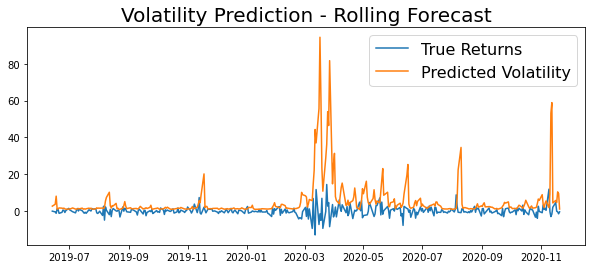

In [17]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_forecasting)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# S&P 500

In [18]:
start = datetime(2000, 1, 1)
end = datetime(2020, 6, 10)

In [19]:
spy = web.DataReader('SPY', 'yahoo', start=start, end=end)

In [20]:
returns = 100 * spy.Close.pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

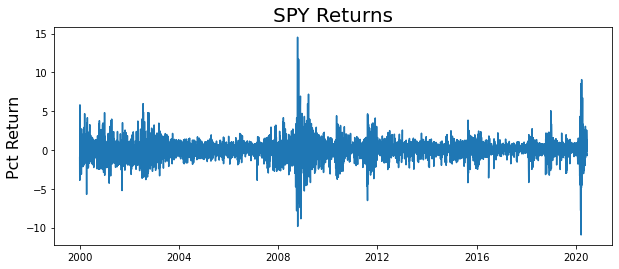

In [21]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

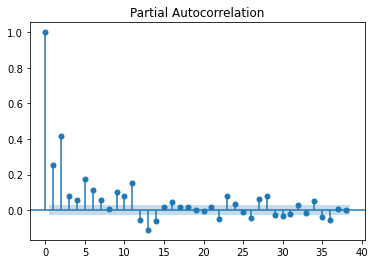

In [22]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(2,2)

In [23]:
model = arch_model(returns, p=2, q=2)

In [24]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 96406.10214170507
Iteration:      2,   Func. Count:     20,   Neg. LLF: 55719.51984055393
Iteration:      3,   Func. Count:     31,   Neg. LLF: 11208.591582774583
Iteration:      4,   Func. Count:     40,   Neg. LLF: 15076.565831402586
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2420740294.8580213
Iteration:      6,   Func. Count:     57,   Neg. LLF: 7235.140634230527
Iteration:      7,   Func. Count:     65,   Neg. LLF: 7091.714409795358
Iteration:      8,   Func. Count:     73,   Neg. LLF: 7058.654918538916
Iteration:      9,   Func. Count:     81,   Neg. LLF: 7062.307058947609
Iteration:     10,   Func. Count:     89,   Neg. LLF: 7055.68363697062
Iteration:     11,   Func. Count:     96,   Neg. LLF: 7055.683621971911
Iteration:     12,   Func. Count:    102,   Neg. LLF: 7055.683621970915
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7055.683621971911
            Iterations: 12

In [26]:
print(model_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -7055.68
Distribution:                  Normal   AIC:                           14123.4
Method:            Maximum Likelihood   BIC:                           14162.6
                                        No. Observations:                 5142
Date:                Sun, Nov 22 2020   Df Residuals:                     5136
Time:                        17:56:40   Df Model:                            6
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0663  1.096e-02      6.051  1.437e-09 [4.

In [27]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [28]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

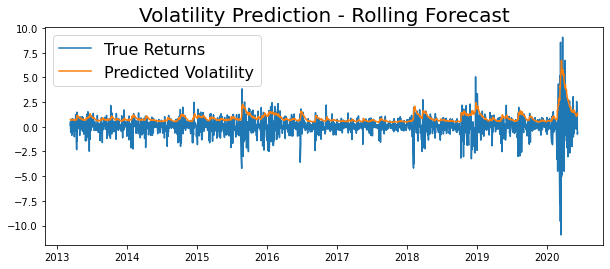

In [29]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [30]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [31]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

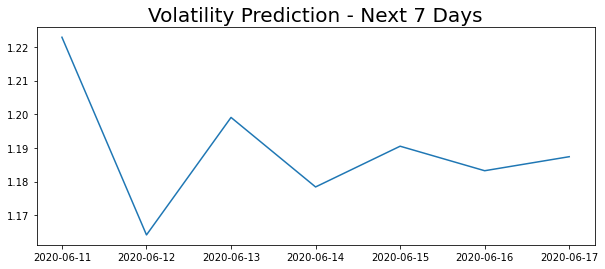

In [32]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)